In [2]:
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
from adjustText import adjust_text
import re
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from tabulate import tabulate
from scipy.interpolate import Rbf

In [140]:
p_gw=get_bands("data/bnds.temp")
p_gw_ladder=get_bands("data/bnds_GWladder.temp")
p_lda=get_bands("data/bnds_LDA.temp")
p_gw_ladder.efermi=np.max(list(p_gw_ladder.bands.values())[0][10])
p_gw.efermi=np.max(list(p_gw.bands.values())[0][10])
p_lda.efermi=np.max(list(p_lda.bands.values())[0][10])

/Users/santy/Google Drive File Stream/My Drive/github projects/questaal-reader/questaal_reader.py:304: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  "Only site.ext format 15 supported at present \n if things dont work That might be the problem"


In [141]:

def get_band_data(det):
    in_gap="-"
    dir_k=det.kpoints[list(det.get_direct_band_gap_dict().values())[0]["kpoint_index"]].frac_coords
    dir_gap=np.round(list(det.get_direct_band_gap_dict().values())[0]["value"],2)
    dir_k=np.array2string(dir_k,suppress_small=True,precision=3,separator=",").replace("[","(").replace("]",")")
    if not det.get_band_gap()['direct']:
        in_gap=np.round(det.get_band_gap()["energy"],2)
        [k_vbm,k_cbm]=det.get_band_gap()['transition'].split("-")
    else:
        k_vbm=k_cbm=dir_k
    return in_gap,k_vbm,k_cbm,dir_k,np.round(dir_gap,2)
data={}
label=["GGA","QSGW","QSGW $\Gamma$"]
data[" "]=["Direct Gap (eV)","Direct gap k-point","Indirect Gap (eV)","CBM k-point","VBM k-point"]
for j,i in enumerate([p_lda,p_gw,p_gw_ladder]):
    in_gap,k_vbm,k_cbm,dir_k,dir_gap=get_band_data(i)
    data[label[j]]=[dir_gap,dir_k,in_gap,k_cbm,k_vbm]
    
print(tabulate(data,headers="keys",tablefmt="fancy_grid"))

╒════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│                    │ GGA                 │ QSGW                │ QSGW $\Gamma$       │
╞════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ Direct Gap (eV)    │ 1.36                │ 4.62                │ 4.62                │
├────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Direct gap k-point │ (0.224,0.307,0.549) │ (0.214,0.293,0.524) │ (0.214,0.293,0.524) │
├────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Indirect Gap (eV)  │ -                   │ -                   │ -                   │
├────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ CBM k-point        │ (0.224,0.307,0.549) │ (0.214,0.293,0.524) │ (0.214,0.293,0.524) │
├────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ VBM k-point        

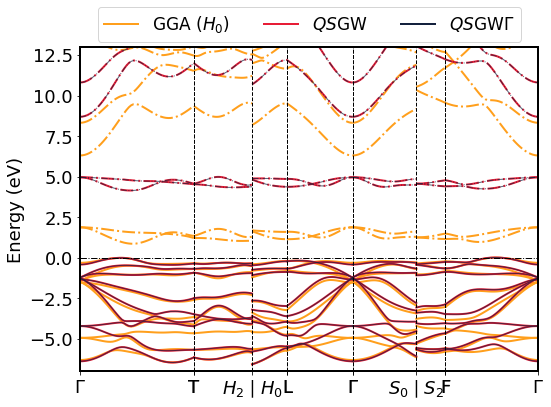

In [209]:
fig,ax=plt.subplots(figsize=(8,6))

colors = ["#ff9f1c","#e71d36","#14213d"]

bp_plot=bp(p_lda).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for k in e:
        if k[0]>0:ls="-."#c="#e9c46a"
        else:ls="-"#c="#e76f51"
        c=colors[0]
        plt.plot(d,k,c=c,lw=2,ls=ls)

    
bp_plot=bp(p_gw).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for k in e:
        if k[0]>0:ls="-."#c="#e9c46a"
        else:ls="-"#c="#e76f51"
        c=colors[1]
        plt.plot(d,k,c=c,lw=2,ls=ls)
        
        
    
bp_plot=bp(p_gw_ladder).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for k in e:
        if k[0]>0:ls="-."#c="#e9c46a"
        else:ls="-"#c="#e76f51"
        c=colors[2]
        plt.plot(d,k,c=c,lw=1,ls=ls,alpha=.7)        


for j,i in enumerate(bp_plot['ticks']["distance"]):
    plt.axvline(i,c="k",ls="--",lw=1)
    

fs=18
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['GGA ($H_0$)', '$\it{QS}$GW','$\it{QS}$GW$\Gamma$']
plt.legend(lines, labels,loc="upper center",fontsize=fs-1, bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False) 
plt.yticks(fontsize=fs)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=fs)
ax.axhline(0,ls="-.",c="k",lw=1)
plt.ylim(-7,13)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)",fontsize=fs)
plt.tight_layout()

# plt.savefig("figs/bands_compare.png",dpi=500)
plt.show()

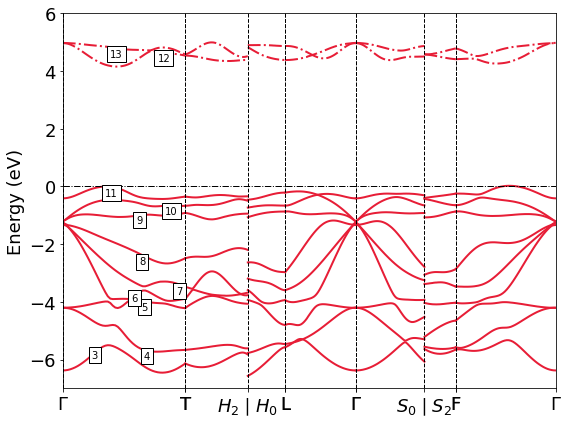

In [5]:
fig,ax=plt.subplots(figsize=(8,6))

colors = ["#ff9f1c","#e71d36","#14213d"]

    
bp_plot=bp(p_gw).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for ki,k in enumerate(e):
        if k[0]>0:ls="-."#c="#e9c46a"
        else:ls="-"#c="#e76f51"
        c=colors[1]
        plt.plot(d,k,c=c,lw=2,ls=ls)
        if i==0 and ki<=12 and ki>1:
            n=np.random.randint(10,len(d))
            ax.text(d[n],k[n], str(ki+1), size=10.,
             ha="right", va="top",
             bbox=dict(boxstyle="square",
                       ec=(0,0,0),
                       fc=(1., 1, 1),
                       )
             )
        
for j,i in enumerate(bp_plot['ticks']["distance"]):
    plt.axvline(i,c="k",ls="--",lw=1)
    
fs=18

plt.yticks(fontsize=fs)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=fs)
ax.axhline(0,ls="-.",c="k",lw=1)
plt.ylim(-7,6)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)",fontsize=fs)
plt.tight_layout()
plt.savefig("figs/bands_numbered.png",dpi=500)
plt.show()

## Effect of local fields on optical RPA/BSE level

In [3]:
import re
def get_eps(fname):
    def norm(x):
        return x / np.trapz(x)
    def spectrum(E,osc,sigma,x):
        gE=[]
        for Ei in x:
            tot=0
            for Ej,os in zip(E,osc):
                tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
            gE.append(tot)
        return gE
    E=np.loadtxt(fname,comments="#").T
    r=spectrum(E[0],E[2],sigma=.08,x=E[0])
    return [E[0],r]
bse_xy_wlocal=get_eps("data/bulk/BSE_wlocal_xy")
bse_z_wlocal=get_eps("data/bulk/BSE_wlocal_z")
rpa_xy_wlocal=get_eps("data/bulk/RPA_wlocal_xy")
rpa_z_wlocal=get_eps("data/bulk/RPA_wlocal_z")

bse_xy_wolocal=get_eps("data/bulk/BSE_wolocal_xy")
bse_z_wolocal=get_eps("data/bulk/BSE_wolocal_z")
rpa_xy_wolocal=get_eps("data/bulk/RPA_wolocal_xy")
rpa_z_wolocal=get_eps("data/bulk/RPA_wolocal_z")

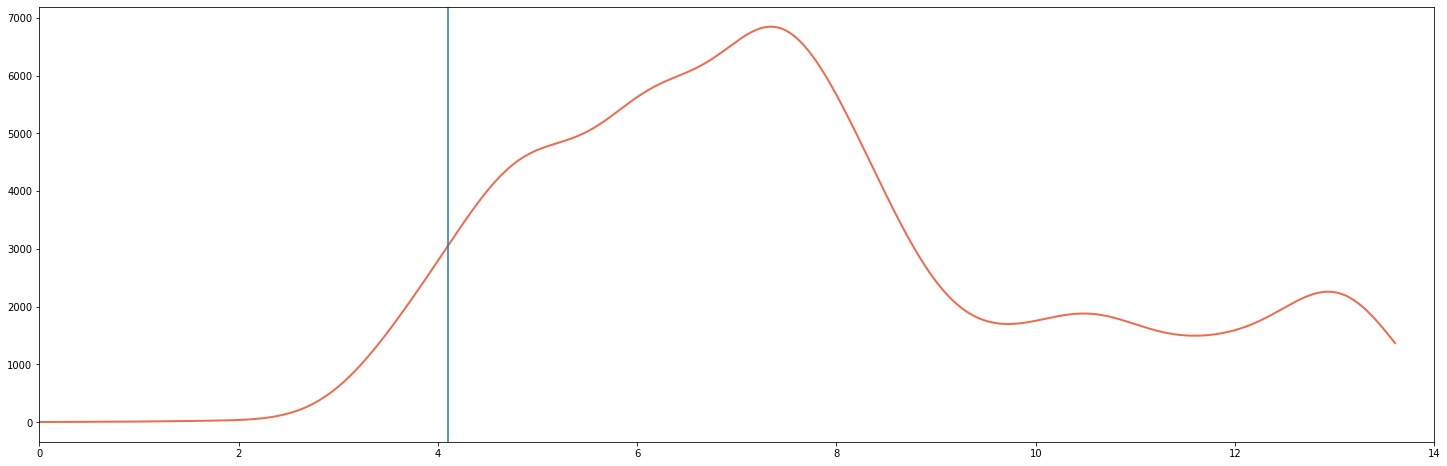

In [34]:
from numba import njit
@njit
def spectrum(E,osc,sigma,x):
    gE=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE.append(tot)
    return gE


data=bse_z_wlocal
data1=bse_xy_wlocal
y=2*np.array(data[1])+np.array(data1[1])
y=spectrum(data[0],y,sigma=.74,x=data[0])
fig = plt.figure(figsize=(25, 8)) 
plt.plot(data[0],y,c="#ee6c4d",linestyle="-",label="LFE $xy$",lw=2)
plt.axvline(4.1)
plt.xlim(0,14)
plt.show()

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


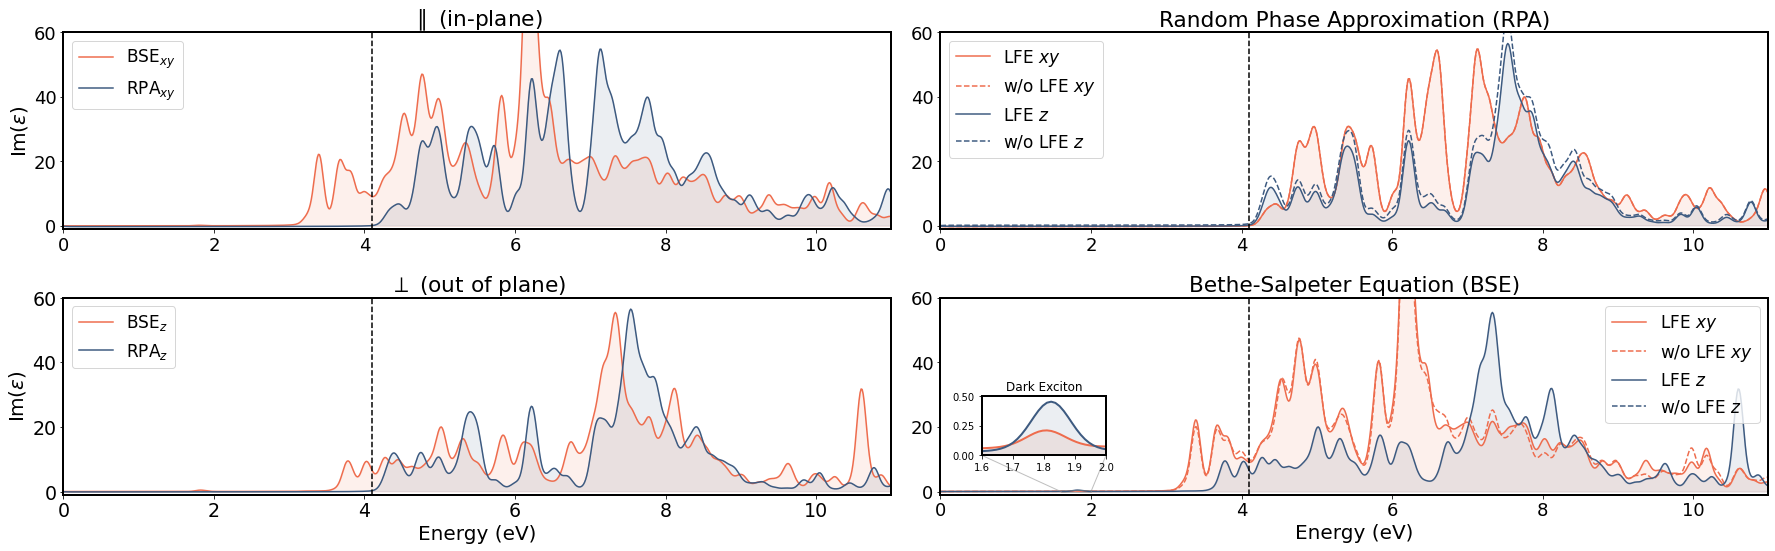

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#plt.style.use(['science','high-vis'])


fig = plt.figure(figsize=(25, 8)) 
gs = gridspec.GridSpec(2, 2) 

ax = plt.subplot(gs[0,1])
data=rpa_xy_wlocal
ax.plot(data[0],data[1],c="#ee6c4d",linestyle="-",label="LFE $xy$",lw=1.5)
ax.fill_between(data[0],data[1], color='#ee6c4d',alpha=.1)
data=rpa_xy_wolocal
ax.plot(data[0],data[1],c="#ee6c4d",linestyle="--",lw=1.5,label="w/o LFE $xy$")
data=rpa_z_wlocal
ax.plot(data[0],data[1],c='#3d5a80',linestyle="-",label="LFE $z$",lw=1.5)
ax.fill_between(data[0],data[1], color='#3d5a80',alpha=.1)
data=rpa_z_wolocal
ax.plot(data[0],data[1],c='#3d5a80',linestyle="--",lw=1.5,label="w/o LFE $z$")
ax.set_title("Random Phase Approximation (RPA)")
ax.set_xlim([0,11])
ax.set_ylim([-1,60])
ax.legend(loc='upper left')
# ax.set_ylabel("Im($\epsilon$)", fontsize=20)
# ax.set_xlabel("Energy (eV)", fontsize=20)

ax = plt.subplot(gs[1,1])
data=bse_xy_wlocal
ax.plot(data[0],data[1],c="#ee6c4d",linestyle="-",label="LFE $xy$",lw=1.5)
ax.fill_between(data[0],data[1], color='#ee6c4d',alpha=.1)
data=bse_xy_wolocal
ax.plot(data[0],data[1],c="#ee6c4d",linestyle="--",lw=1.5,label="w/o LFE $xy$")
data=bse_z_wlocal
ax.plot(data[0],data[1],c='#3d5a80',linestyle="-",label="LFE $z$",lw=1.5)
ax.fill_between(data[0],data[1], color='#3d5a80',alpha=.1)
data=bse_z_wolocal
ax.plot(data[0],data[1],c='#3d5a80',linestyle="--",lw=1.5,label="w/o LFE $z$")
ax.set_title("Bethe-Salpeter Equation (BSE)")
ax.set_xlim([0,11])
ax.set_ylim([-1,60])
ax.legend(loc='upper right')
# ax.set_ylabel("Im($\epsilon$)", fontsize=20)
ax.set_xlabel("Energy (eV)", fontsize=20)
ins = ax.inset_axes([0.05,0.2,0.15,0.3])
data=bse_xy_wlocal
ins.plot(data[0],data[1],c="#ee6c4d",linestyle="-",label="BSE$_{z}$",lw=2)
ins.fill_between(data[0],data[1], color='#ee6c4d',alpha=.1)
data=bse_z_wlocal
ins.plot(data[0],data[1],c="#3d5a80",linestyle="-",label="BSE$_{z}$",lw=2)
ins.fill_between(data[0],data[1], color='#3d5a80',alpha=.1)
ins.set_xlim([1.6,2])
ins.set_ylim([-0,.5])
ins.tick_params(axis='both', which='major', labelsize=10)
ins.set_title("Dark Exciton",fontsize=12)
ax.indicate_inset_zoom(ins)



ax = plt.subplot(gs[0,0])
data=bse_xy_wlocal
ax.plot(data[0],data[1],c="#ee6c4d",linestyle="-",label="BSE$_{xy}$",lw=1.5)
ax.fill_between(data[0],data[1], color='#ee6c4d',alpha=.1)
data=rpa_xy_wlocal
ax.plot(data[0],data[1],c='#3d5a80',linestyle="-",label="RPA$_{xy}$",lw=1.5)
ax.fill_between(data[0],data[1], color='#3d5a80',alpha=.1)
ax.set_title("$\parallel$ (in-plane)")
ax.set_xlim([0,11])
ax.set_ylim([-1,60])
ax.legend(loc='upper left')
ax.set_ylabel("Im($\epsilon$)", fontsize=20)
# ax.set_xlabel("Energy (eV)", fontsize=20)


ax = plt.subplot(gs[1,0])
data=bse_z_wlocal
ax.plot(data[0],data[1],c="#ee6c4d",linestyle="-",label="BSE$_{z}$",lw=1.5)
ax.fill_between(data[0],data[1], color='#ee6c4d',alpha=.1)
data=rpa_z_wlocal
ax.plot(data[0],data[1],c='#3d5a80',linestyle="-",label="RPA$_{z}$",lw=1.5)
ax.fill_between(data[0],data[1], color='#3d5a80',alpha=.1)
ax.set_title("$\perp$ (out of plane)")
ax.set_xlim([0,11])
ax.set_ylim([-1,60])
ax.legend(loc='upper left')
ax.set_ylabel("Im($\epsilon$)", fontsize=20)
ax.set_xlabel("Energy (eV)", fontsize=20)



plt.rc('legend',**{'fontsize':17})
plt.xticks(size = 19)
plt.yticks(size = 19)

for i in gs:
    ax = plt.subplot(i)
    ax.axvline(4.1,c="k",ls="--")



plt.tight_layout()

plt.show()
fig.savefig('figs/optics_compare.png', bbox_inches='tight',dpi=300)

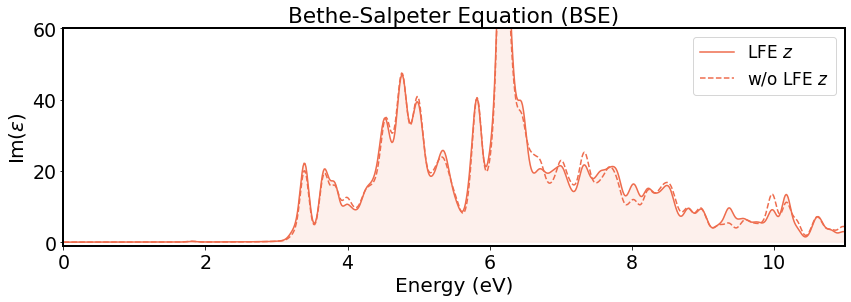

In [238]:
def norm(x):
    return x / np.trapz(x)
def spectrum(E,osc,sigma,x):
    gE=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE.append(tot)
    return gE

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science','high-vis'])


import re
fig,ax=plt.subplots(figsize=(14,4))

fname="data/bulk/BSE_wlocal_xy"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="#ee6c4d",linestyle="-",label="LFE $z$",lw=1.5)
ax.fill_between(E[0],r, color='#ee6c4d',alpha=.1)

fname="data/bulk/BSE_wolocal_xy"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="#ee6c4d",linestyle="--",lw=1.5,label="w/o LFE $z$")

ax.set_title("Bethe-Salpeter Equation (BSE)")
plt.xlim([0,11])
plt.ylim([-1,60])
plt.rc('legend',**{'fontsize':17})
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.ylabel("Im($\epsilon$)", fontsize=20)
plt.xlabel("Energy (eV)", fontsize=20)
plt.legend(loc='upper right')
plt.show()
fig.savefig('figs/BSE-LFE.png', bbox_inches='tight',dpi=600)

----

# BSE Values plot

In [202]:
with open('./data/Eigenvals_bse') as f:
    evals = np.array([list(map(float, i[2:-2].split(','))) for i in f]).T[0]*13.6056980659

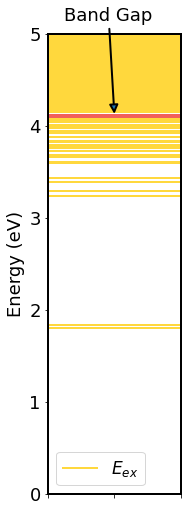

In [299]:
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['axes.linewidth'] = 2
fig2 = plt.figure(figsize=(2.5,7),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig2)
#plt.scatter(evals,range(len(evals)),s=3)
ax =  fig2.add_subplot(spec2[0, 0])
for i in evals[0:800]:
    ax.axhline(i,c="#FFD83D",alpha=1,lw=2)
ax.axhline(evals[0],c="#FFD83D",alpha=1,lw=2,label="$E_{ex}$")
plt.legend()
ax.axhline(4.11,c="#f25f5c",linestyle="-",lw=4,alpha=1)
ax.set_ylabel("Energy (eV)")

ax.annotate('Band Gap',
            xy=(.5, 4.11),
            xytext=(.125, 5.1),  
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",linewidth=2),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
ax.set_ylim([0,5])
ax.set_xticklabels("")
plt.savefig("figs/Excitons.png",dpi=600)
plt.show()

In [204]:
evals[0:10]

array([1.80229596, 1.80244692, 1.83303439, 3.2340823 , 3.23425074,
       3.28743272, 3.39446151, 3.39447032, 3.43016876, 3.59889121])

# Im($\epsilon$) Optics band-band contribution

pip install proplot

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def get_components(fname="data/popt.temp"):
    lines = open(fname).read().split('\n')
    r,c=int(lines[0].split(" ")[2]),int(lines[0].split(" ")[4])
    vals=[]
    for i in "  ".join(lines[1:]).split("  "):
        try:
            vals.append(float(i))
        except:
            None
    e=[t*13.605 for t in vals[0::c]]
    vals=np.array(vals)
    l=3
    m=12
    num_bands=int((c-1)/3) 
    vals1=np.arange(1,num_bands +1,1)
    direction="z"
    vals_bandsx=[]
    vals_bandsz=[]
    bands=[]
    plot=1
    if plot:
        for i in vals1:
           #y=(vals[i::c]+vals[i+1::c]+vals[i+2::c])/3.
            if direction=="x":
                y=vals[i::c]
                #plt.plot(e,y,label=str(l)+"-"+str(m),alpha=1,lw=1.5)
                vals_bandsx.append(y)

            if direction=="z":
                y=vals[i+num_bands*2::c]
                #plt.plot(e,y,label=str(l)+"-"+str(m),alpha=1,lw=1.5)
                vals_bandsz.append(y)
            bands.append(str(l)+"-"+str(m))    
            l=l+1
            if l==12:
                l=3
                m=m+1

    vals_bands=[]

    fullx=[]
    fullz=[]

    for i in np.arange(1,num_bands +1,1):
        yx=(vals[i::c])
        fullx.append(yx)
        yz=(vals[i+num_bands*2::c])
        fullz.append(yz)
    return e,fullx,fullz,vals_bandsz,bands

In [198]:
def plot_optics(ax):
    e,fullx,fullz,vals_bandsz,bands=get_components(fname="data/popt.temp")
    #Get data
    data=np.true_divide(vals_bands,vals_bands.sum(axis=0, keepdims=True))
    n=data.shape[0]-17

    #plot
    fs=12
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["w","#ff6b6b"])
    p=ax.pcolor(e,range(n),data[0:n],cmap=cmap)
    for i in range(n):
        ax.axhline(i,c="k",lw=0.5,ls=":")
    ax.set_yticks(np.arange(n-1)+0.5)
    ax.set_yticklabels(bands)
    ax.set_ylabel("Band-Band contributions",fontsize=fs)
    cbaxes = inset_axes(ax, width="10%", height="3%", loc=1) 
    cbar=plt.colorbar(p,cax=cbaxes, ticks=[0.,1], orientation='horizontal')
    cbar.set_ticklabels(["$0\%$","$100\%$"])
    #uncomment for showing the band values in text
    # for j,i in enumerate(np.arange(n-1)+0.4):
    #     ax.text(3.5,i,bands[j],ha='center', va='center')
    # ax.set_yticks(np.arange(n)+0.5)
    # ax.set_yticklabels([])  

    #plot variable
    ax1 = ax.twinx()
    ax1.plot(e,np.sum(np.array(fullx),axis=0),c="k")
    ax1.set_ylim(ymin=0)
    ax1.set_ylabel("Im($\epsilon$)",fontsize=fs)
    

    ax.set_ylim(0,n-1)
    ax.set_xlim(3.8,13)
    ax.set_xlabel("Energy (eV)")

def plot_bands_withnumber(ax):
    colors = ["#ff9f1c","#e71d36","#14213d"]
    bp_plot=bp(p_gw).bs_plot_data()
    ef=np.max(np.array(bp_plot['energy'][0]['1'])[10])
    for i in range(len(bp_plot['distances'])):
        d=bp_plot['distances'][i]
        e=bp_plot['energy'][i]['1']
        e=e-ef
        for ki,k in enumerate(e):
            if k[0]>0:ls="-."#c="#e9c46a"
            else:ls="-"#c="#e76f51"
            c=colors[1]
            plt.plot(d,k,c=c,lw=2,ls=ls)
            if i==range(len(bp_plot['distances']))[-1] and ki<=12 and ki>1:
                n=np.random.randint(10,len(d))
                ax.text(d[n],k[n], str(ki+1), size=10.,
                 ha="right", va="top",
                 bbox=dict(boxstyle="square",
                           ec=(0,0,0),
                           fc=(1., 1, 1),
                           )
                 )

    for j,i in enumerate(bp_plot['ticks']["distance"]):
        ax.axvline(i,c="k",ls="--",lw=1)

    fs=12

#     plt.yticks(fontsize=fs)
    ax.set_xticks(bp_plot['ticks']["distance"])
    ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=fs)
    ax.axhline(0,ls="-.",c="k",lw=1)
    ax.set_ylim(-7,6)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.set_ylabel("Energy (eV)",fontsize=fs)

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


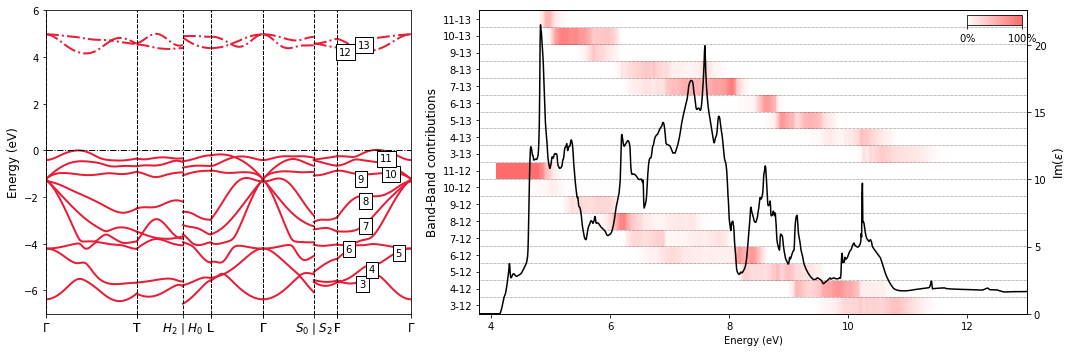

In [199]:
from matplotlib import gridspec
np.random.seed(35)#7,35 is good
fig = plt.figure(figsize=(15, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.5]) 
ax = plt.subplot(gs[1])
plot_optics(ax)

ax = plt.subplot(gs[0])
plot_bands_withnumber(ax)

plt.tight_layout()
plt.savefig("figs/band-band-transition.png",dpi=300)
plt.show()

----
# Exciton k space and band space distribution

### Effective equation that is being solved - 

### $$\sum_{n_{3} n_{4}} \left(H^{2 p }\right)_{n_{1} n_{2}}^{n_{3} n_{4}} A_{\lambda}^{n_{3} n_{4}}(\mathbf{k})=E_{\lambda} A_{\lambda}^{n_{1} n_{2}}(\mathbf{k})$$



In [343]:
def get_eigvec_qpts(nc,nv,nk,eig_fname,qpts_fname="QBZ"):
    '''
    returns wave function in format [nth eig,kpt,nv,nc]
    '''
    t=0
    eigenvecs=[]
    def extract_nums(text):
        numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
        rx = re.compile(numeric_const_pattern, re.VERBOSE)
        num=[float(i) for i in rx.findall(text)]
        try:
            return num[0]+1j*num[1]
        except:None
    tmp=[]
    with open(eig_fname) as topo_file:
        for line in topo_file:
            if "val" not in line:
                eigenvecs.append(extract_nums(line))
    def extract_nums(text):
        numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
        rx = re.compile(numeric_const_pattern, re.VERBOSE)
        num=[float(i) for i in rx.findall(text.replace('D','e'))]
        try:
            return num
        except:None
    kpts=[]
    with open(qpts_fname) as topo_file:
        for line in topo_file:
            kpts.append(extract_nums(line))
    kpts=np.array(kpts[1:]).T
    n=int(len(eigenvecs)/(nk*nk*nk*nv*nc))
    wav=np.zeros((n,nk*nk*nk,nv,nc))*1j
    cnt=0
    for ni in range(n):
        for j in range(nv):
            for k in range(nc):
                for i in range(nk*nk*nk):
                    wav[ni][i][nv-j-1][nc-k-1]=eigenvecs[cnt]
                    cnt+=1
    return wav,kpts


In [344]:
nc=8;nv=3;nk=6
wav,kpts=get_eigvec_qpts(nc=nc,nv=nv,nk=nk,eig_fname="./data/eigenvectors.temp",qpts_fname="./data/QBZ")

----
### Band space distribution

## $$|\lambda,n_1,n_2>=w^{n_{1} n_{2}}_\lambda=\int d\mathbf{k} A_{\lambda}^{n_{1} n_{2}}(\mathbf{k})$$

## $$|\Psi_\lambda(n_1,n_2)|^2 =  <\lambda,n_1,n_2|\lambda,n_1,n_2> $$

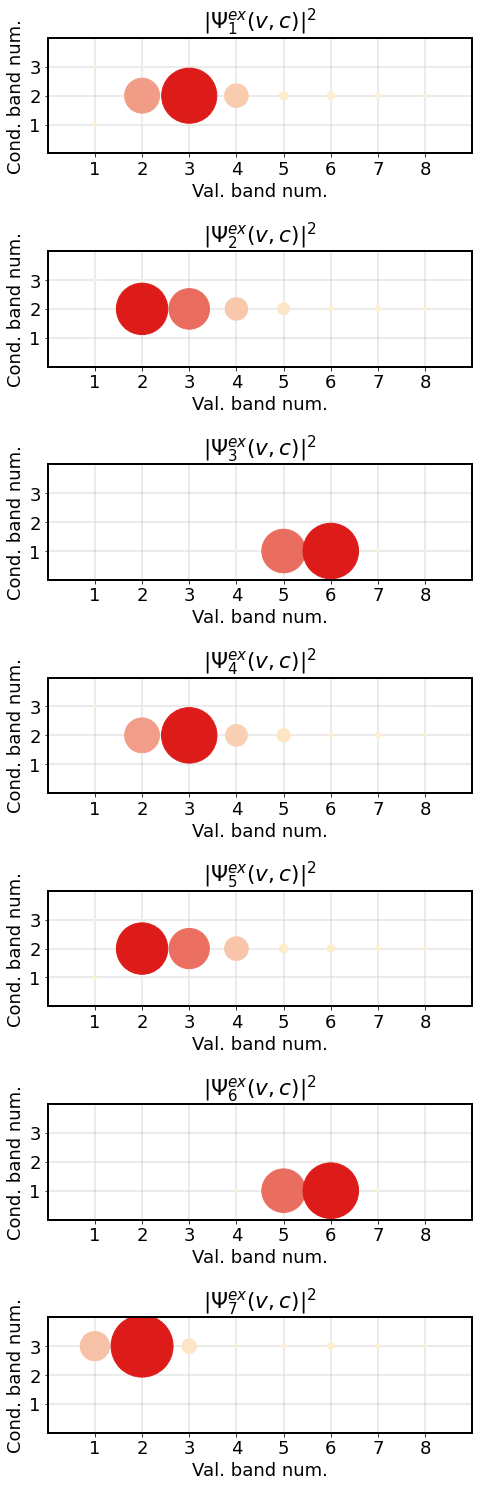

In [345]:
n=wav.shape[0]
n=7
fig,ax=plt.subplots(n,1,facecolor="w",figsize=(7,3*n))
x=np.arange(1,nc+1)
y=np.arange(1,nv+1)
X,Y=np.meshgrid(x,y)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fff1d0","#dd1c1a"])
for i in ax:
    for j in range(1,nc+1):
        i.axvline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    for j in range(1,nv+1):
        i.axhline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    i.set_ylim(0,4)
    i.set_xlim(0,9)
    i.set_xticks(range(1,nc+1))
    i.set_yticks(range(1,nv+1))
    i.set_ylabel("Cond. band num.")
    i.set_xlabel("Val. band num.")
    
for i in range(n):
    W1=np.sum(np.real(np.multiply(wav[i],np.conjugate(wav[i]))),axis=0)
    ax[i].set_title("$|\Psi_{"+str(i+1)+"}^{ex}(v,c)|^2$")
    ax[i].scatter(X,Y,c=W1,cmap=cmap,s=W1*500*10)
plt.tight_layout()

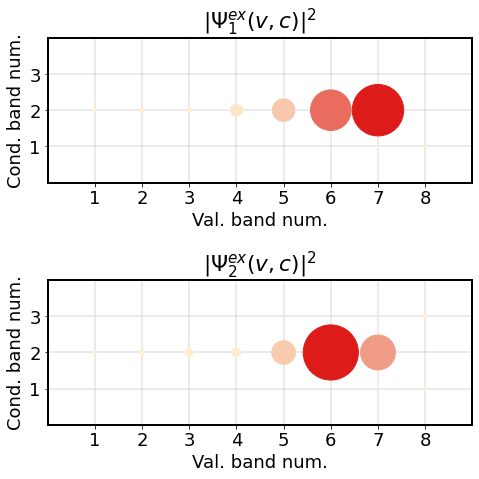

In [317]:
      

fig,ax=plt.subplots(2,1,facecolor="w",figsize=(7,7))
x=np.arange(1,nc+1)
y=np.arange(1,nv+1)
X,Y=np.meshgrid(x,y)



norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fff1d0","#dd1c1a"])
for i in ax:
    for j in range(1,nc+1):
        i.axvline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    for j in range(1,nv+1):
        i.axhline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    i.set_ylim(0,4)
    i.set_xlim(0,9)
    i.set_xticks(range(1,nc+1))
    i.set_yticks(range(1,nv+1))
    i.set_ylabel("Cond. band num.")
    i.set_xlabel("Val. band num.")

W1=np.sum(np.real(np.multiply(wav1,np.conjugate(wav1))),axis=0)
ax[0].set_title("$|\Psi_{1}^{ex}(v,c)|^2$")
ax[0].scatter(X,Y,c=W1,cmap=cmap,s=W1*500*10)


W2=np.sum(np.real(np.multiply(wav2,np.conjugate(wav2))),axis=0)
ax[1].scatter(X,Y,c=W2,cmap=cmap,s=W2*500*10)#s=200*10)
ax[1].set_title("$|\Psi_{2}^{ex}(v,c)|^2$")
plt.tight_layout()
#plt.savefig("figs/Exciton_band.png",dpi=600)
plt.show()


### k-space distribution 

## $$|\lambda,\mathbf{k}>=\sum_{n_1,n_2} A_{\lambda}^{n_{1} n_{2}}(\mathbf{k})$$

## $$|\Psi_\lambda(\mathbf{k})|^2=<\lambda,\mathbf{k}|\lambda,\mathbf{k}>$$

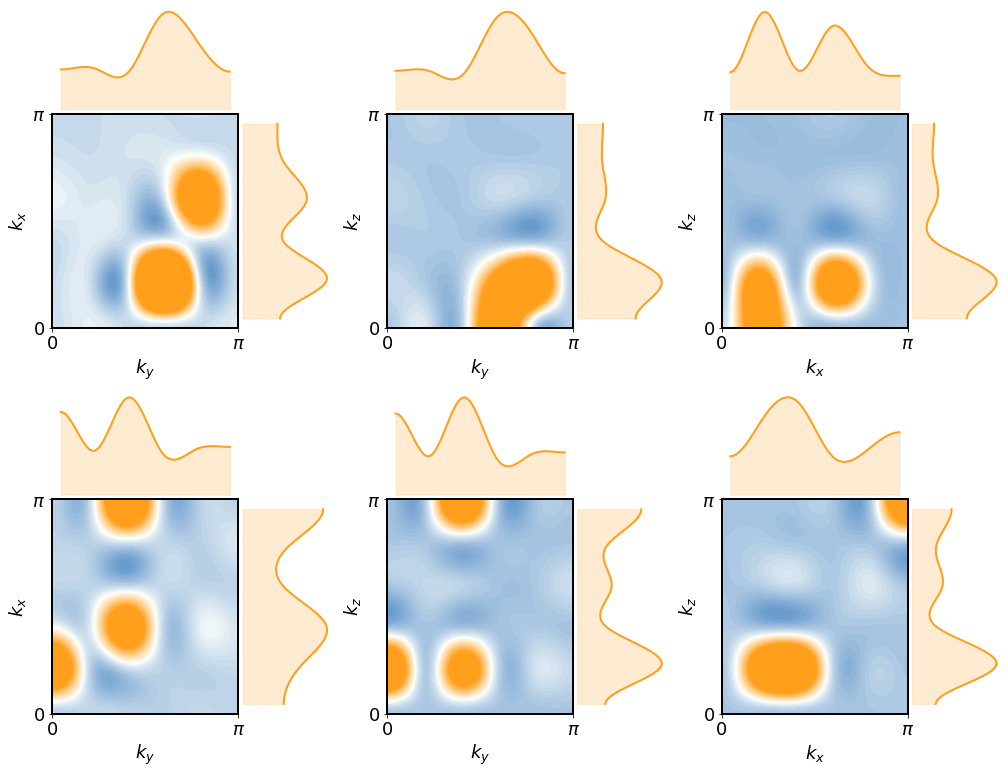

In [395]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



def plot_grid(wav,axis=0,gs_temp=None):
    gs0 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs_temp, wspace=-0,hspace=0)
    z=10
    data=np.sum(np.sum(np.real(np.multiply(wav,np.conjugate(wav))),axis=(1,2)).reshape(nk,nk,nk),axis=axis)
    data = scipy.ndimage.zoom(data,z)
    data=data-data.min()
    color=["#6699cc","#fdfffc","#ff9f1c"]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",color )
    
    kx=ky=np.linspace(0,1,data.shape[0])    
    axkx = plt.subplot(gs0[0,0:2])
    axkx.plot(kx,np.mean(data,axis=0),color=color[-1],alpha=1,lw=2)
    axkx.fill_between(kx,np.mean(data,axis=0),color=color[-1],alpha=0.2)
    axkx.axis('off')
    axkx.set_yticklabels("")
    axkx.set_xticklabels("")

    axky = plt.subplot(gs0[1:3,2])
    axky.plot(np.mean(data,axis=1),ky,color=color[-1],alpha=1,lw=2)
    axky.fill_betweenx(ky,np.mean(data,axis=1),color=color[-1],alpha=0.2)
    axky.axis('off')
    axky.set_yticklabels("")
    axky.set_xticklabels("")
    
    label=[["$k_x$","$k_y$"],["$k_z$","$k_y$"],["$k_z$","$k_x$"]]

    ax00 = plt.subplot(gs0[1:3,0:2])
    ax00.contourf(kx,ky,data,90,cmap=cmap,vmin=0,vmax=.2)
    ax00.set_xticks([0,1])
    ax00.set_yticks([0,1])
    ax00.set_yticklabels(['0',"$\pi$"])
    ax00.set_xticklabels(['0',"$\pi$"])
    ax00.set_ylabel(label[axis][0])
    ax00.set_xlabel(label[axis][1])
    
fig = plt.figure(figsize=(17,13))

gs = gridspec.GridSpec(2, 3,wspace=.2,hspace=.2)
plot_grid(wav1,0,gs[0,0])
plot_grid(wav1,1,gs[0,1])
plot_grid(wav1,2,gs[0,2])


plot_grid(wav2,0,gs[1,0])
plot_grid(wav2,1,gs[1,1])
plot_grid(wav2,2,gs[1,2])
#plt.savefig("figs/Exciton_kspace.png",dpi=600)
plt.show()

### Better way to visualize 

/Users/santy/Google Drive File Stream/My Drive/github projects/questaal-reader/questaal_reader.py:304: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  "Only site.ext format 15 supported at present \n if things dont work That might be the problem"


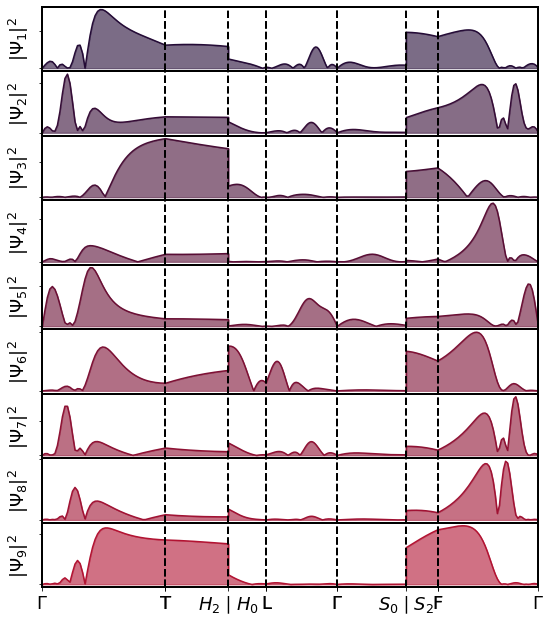

In [372]:
N=9
fig = plt.figure(figsize=(8,N),tight_layout=True)
gs = gridspec.GridSpec(N, 1,hspace=0)

p_gw=get_bands("data/bnds.temp")
kpts_bands=np.array([i.frac_coords for i in p_gw.kpoints])
color=["#c31432","#240b36"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",color )

n=0
Ax=[]
for n in range(N):
    ax = fig.add_subplot(gs[n])
    data=np.sum(np.real(np.multiply(wav[n],np.conjugate(wav[n]))),axis=(1,2)).reshape(nk,nk,nk)
    rbfi1 = Rbf(kpts[0], kpts[1], kpts[2], data.flatten()) 
    y=rbfi1(kpts_bands.T[0],kpts_bands.T[1],kpts_bands.T[2])
    # y[y<0]=0
    y=np.sqrt(np.square(y))
    x=np.array(bp_plot['distances']).flatten()
    c=cmap(1 - n/N)
    ax.plot(x,y,c=c)
    ax.fill_between(x,y,color=c,alpha=.6)
    for j,i in enumerate(bp_plot['ticks']["distance"]):
        ax.axvline(i,c="k",ls="--",lw=2)
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    label="$|\Psi_{"+str(n+1)+"}|^2$"
    ax.set_ylabel(label)
    ax.autoscale(enable=True, axis='x', tight=True)
    Ax.append(ax)
        

    
fs=18
ax = Ax[-1]
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=fs)
plt.tight_layout()
plt.show()

## combining the plots

/Users/santy/Google Drive File Stream/My Drive/github projects/questaal-reader/questaal_reader.py:304: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  "Only site.ext format 15 supported at present \n if things dont work That might be the problem"


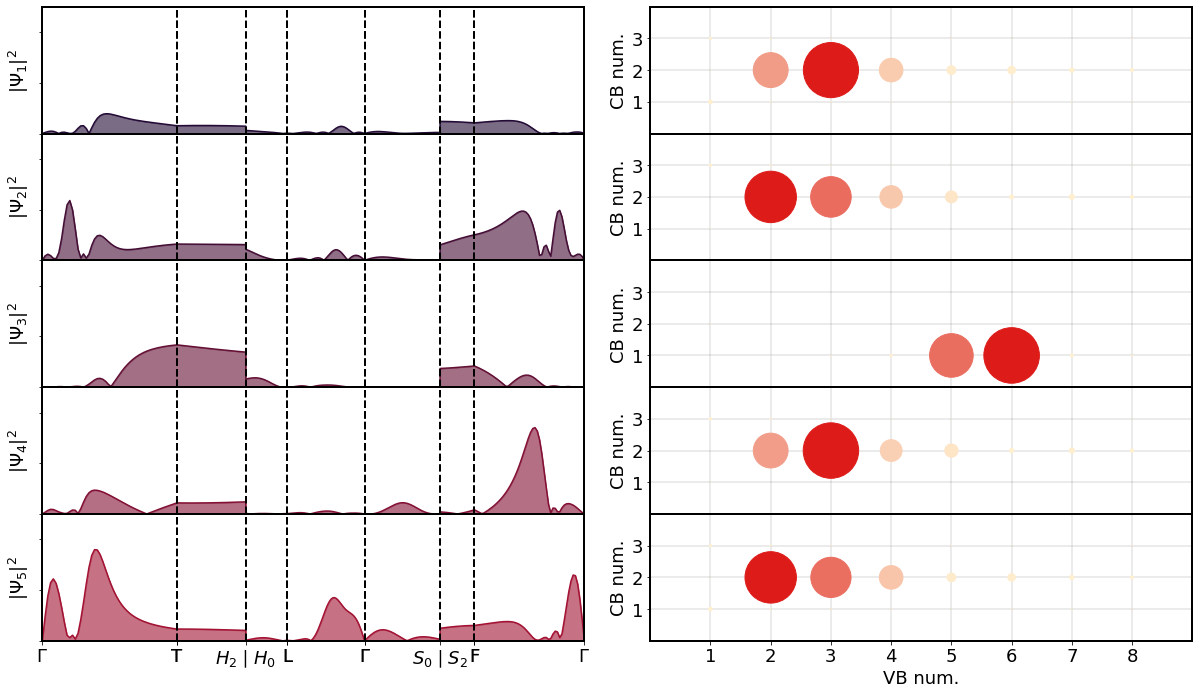

In [401]:
n=wav.shape[0]
N=5

fig = plt.figure(figsize=(17,N*2))
gs = gridspec.GridSpec(1, 2)

gs0 = gridspec.GridSpecFromSubplotSpec(N, 1, subplot_spec=gs[0,1], wspace=-0,hspace=0)

x=np.arange(1,nc+1)
y=np.arange(1,nv+1)
X,Y=np.meshgrid(x,y)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fff1d0","#dd1c1a"])
ax=[plt.subplot(gs0[i] ) for i in range(N)]
for i in ax:
    for j in range(1,nc+1):
        i.axvline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    for j in range(1,nv+1):
        i.axhline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    i.set_ylim(0,4)
    i.set_xlim(0,9)
    i.set_xticks(range(1,nc+1))
    i.set_yticks(range(1,nv+1))
    i.set_ylabel("CB num.")
#     i.set_xlabel("Val. band num.")
ax[-1].set_xlabel("VB num.")  
for i in range(N):
    W1=np.sum(np.real(np.multiply(wav[i],np.conjugate(wav[i]))),axis=0)
#     ax[i].set_title("$|\Psi_{"+str(i+1)+"}^{ex}(v,c)|^2$")
    ax[i].scatter(X,Y,c=W1,cmap=cmap,s=W1*500*10)
    
    
gs0 = gridspec.GridSpecFromSubplotSpec(N, 1, subplot_spec=gs[0,0],hspace=0)

p_gw=get_bands("data/bnds.temp")
kpts_bands=np.array([i.frac_coords for i in p_gw.kpoints])
color=["#c31432","#240b36"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",color )

n=0
Ax=[]
for n in range(N):
    ax = fig.add_subplot(gs0[n])
    data=np.sum(np.real(np.multiply(wav[n],np.conjugate(wav[n]))),axis=(1,2)).reshape(nk,nk,nk)
    rbfi1 = Rbf(kpts[0], kpts[1], kpts[2], data.flatten()) 
    y=rbfi1(kpts_bands.T[0],kpts_bands.T[1],kpts_bands.T[2])
    # y[y<0]=0
    y=np.sqrt(np.square(y))
    x=np.array(bp_plot['distances']).flatten()
    c=cmap(1 - n/N)
    ax.plot(x,y,c=c)
    ax.fill_between(x,y,color=c,alpha=.6)
    for j,i in enumerate(bp_plot['ticks']["distance"]):
        ax.axvline(i,c="k",ls="--",lw=2)
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    label="$|\Psi_{"+str(n+1)+"}|^2$"
    ax.set_ylabel(label)
    ax.set_ylim(0,.5)
    ax.autoscale(enable=True, axis='x', tight=True)
    Ax.append(ax)
        

    
fs=18
ax = Ax[-1]
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"])
    
    
    
    
    
plt.tight_layout()

----
### take the product of real space density of nth band and mth band at k and weight it by n1,n2,k contribution ?


### $$ |\Psi^\prime_\lambda (\mathbf{r_1},\mathbf{r_2})|^2=\sum_{n_1,n_2}\int d\mathbf{k} \ A_\lambda^{n_1n_2}(\mathbf{k}) \rho_{n_1}(\mathbf{k},\mathbf{r_1}) \rho_{n_2}(\mathbf{k},\mathbf{r_2}) $$

Or use corse grain where $r_i$ is on each muffin tin sphere ?

### $$\Psi_{\lambda}\left(\mathbf{r}_{h}, \mathbf{r}_{e}\right)=\sum_{v c \mathbf{k}} A_{v c \mathbf{k}}^{\lambda} \psi_{v \mathbf{k}}\left(\mathbf{r}_{h}\right) \psi_{c \mathbf{k}}^{*}\left(\mathbf{r}_{e}\right)$$

-----
# Mono Layer

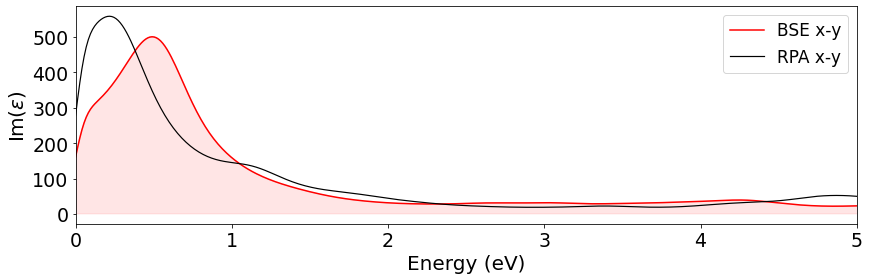

In [5]:
def norm(x):
    return x / np.trapz(x)
def spectrum(E,osc,sigma,x):
    gE=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE.append(tot)
    return gE

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science','high-vis'])


import re
fig,ax=plt.subplots(figsize=(14,4))

fname="./data/monolayer/BSE_z"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="r",linestyle="-",label="BSE x-y",lw=1.5)
ax.fill_between(E[0],r, color='red',alpha=.1)


fname="./data/monolayer/RPA_z"
E=np.loadtxt(fname,comments="#").T
r=spectrum(E[0],E[2],sigma=.08,x=E[0])
ax.plot(E[0],r,c="k",linestyle="-",lw=1.2,label="RPA x-y")


plt.xlim([0,5])
#plt.ylim([-1,60])
plt.rc('legend',**{'fontsize':17})
plt.xticks(size = 19)
plt.yticks(size = 19)
plt.ylabel("Im($\epsilon$)", fontsize=20)
plt.xlabel("Energy (eV)", fontsize=20)
plt.legend(loc='upper right')
plt.show()
#fig.savefig('/figs/BSE-RPA-z.png', bbox_inches='tight',dpi=600)



plot_exciton=0
if plot_exciton:
    fig,ax=plt.subplots(figsize=(14,4))
    fname="../LiCoO2/optics/RPA_fine"
    E1=np.loadtxt(fname,comments="#").T
    fname="../LiCoO2/optics/BSE_fine"
    E2=np.loadtxt(fname,comments="#").T
    ax.plot(E[0],(E2[2]-E1[2])/E1[2],c="k",linestyle="-",label="BSE")
    e=(E2[2]-E1[2])/E1[2]
    ax.plot(E[0],e,c="k",linestyle="-",label="BSE")
    #plt.ylim([-1,1])
    #plt.xlim([-.1,10])
    plt.show()

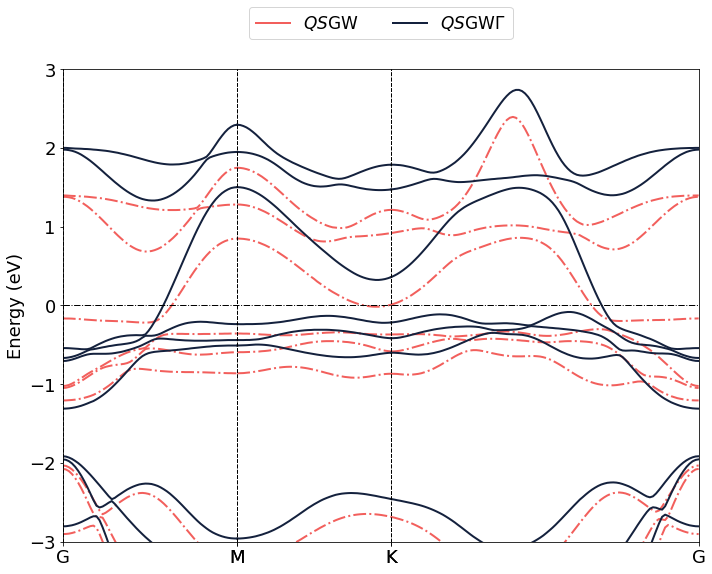

In [39]:
p_gw=get_bands("data/monolayer/bnds_gw.temp")
p_gw_ladder=get_bands("data/monolayer/bnds_bse.temp")

# p_gw.efermi=np.max(list(p_gw.bands.values())[0][10])
# p_lda.efermi=np.max(list(p_lda.bands.values())[0][10])


fig,ax=plt.subplots(figsize=(10,8))

colors = ["#f25f5c","#14213d"]


    
bp_plot=bp(p_gw).bs_plot_data()
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=np.array(bp_plot['energy'][i]['1'])
    e=e-p_gw.efermi
    for k in e:
        if k[0]>0:ls="-."#c="#e9c46a"
        else:ls="-."#c="#e76f51"
        c=colors[0]
        plt.plot(d,k,c=c,lw=2,ls=ls)
        
        
    
bp_plot=bp(p_gw_ladder).bs_plot_data()
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=np.array(bp_plot['energy'][i]['1'])
    e=e-p_gw_ladder.efermi
    for k in e:
        if k[0]>0:ls="-"#c="#e9c46a"
        else:ls="-"#c="#e76f51"
        c=colors[-1]
        plt.plot(d,k,c=c,lw=2,ls=ls,alpha=1)        


for j,i in enumerate(bp_plot['ticks']["distance"]):
    plt.axvline(i,c="k",ls="--",lw=1)
    

fs=18
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['$\it{QS}$GW','$\it{QS}$GW$\Gamma$']
plt.legend(lines, labels,loc="upper center",fontsize=fs-1, bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False) 
plt.yticks(fontsize=fs)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=fs)
ax.axhline(0,ls="-.",c="k",lw=1)
plt.ylim(-3,3)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)",fontsize=fs)
plt.tight_layout()

#plt.savefig("figs/bands_compare.png",dpi=500)
plt.show()